# 2022F-BSE-014

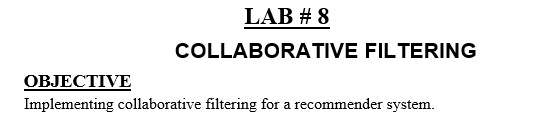

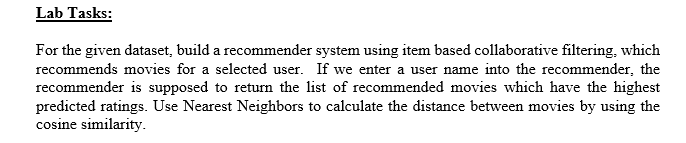

In [4]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import KNNWithMeans

# Dataset with ratings
ratings_dict = {
    "item": [1, 2, 1, 2, 1, 2, 1, 2, 1],
    "user": ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    "rating": [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3],
}

# Create Pandas DataFrame
df = pd.DataFrame(ratings_dict)

# Define the rating scale and load data into Surprise's format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)

# Define item-based collaborative filtering with cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

# Train the algorithm on the full training set
training_set = data.build_full_trainset()
algo.fit(training_set)

# Function to recommend movies for a user
def recommend_movies(user, all_items, algo, top_n=3):
    """
    Recommends top N movies for the given user based on predicted ratings.
    :param user: The user for whom recommendations are to be generated.
    :param all_items: List of all items in the dataset.
    :param algo: Trained algorithm.
    :param top_n: Number of top recommendations to return.
    :return: List of recommended movies with predicted ratings.
    """
    predictions = []
    for item in all_items:
        prediction = algo.predict(user, item)
        predictions.append((item, prediction.est))

    # Sort predictions by estimated rating in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

    # Return the top N recommendations
    return sorted_predictions[:top_n]

# List of all items in the dataset
all_items = df["item"].unique()

# User for whom to recommend movies
user = input('Enter user name:: ')
print('username = ',user)
# Get top 3 recommended movies for user 'E'
recommended_movies = recommend_movies(user, all_items, algo, top_n=3)

# Display the recommended movies
print(f"Top recommended movies for user '{user}':")
for movie, rating in recommended_movies:
    print(f"Movie {movie}: Predicted Rating {rating:.2f}")


Computing the cosine similarity matrix...
Done computing similarity matrix.


Enter user name::  A


username =  A
Top recommended movies for user 'A':
Movie 2: Predicted Rating 2.07
Movie 1: Predicted Rating 1.00


# Home Task

# E-Commerce Product Recommendation:

In [8]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import KNNWithMeans

# Dataset: Ratings of products by users
ratings_dict = {
    "item": [301, 302, 303, 301, 302, 304, 303, 304, 305],
    "user": ['P', 'P', 'Q', 'Q', 'R', 'R', 'S', 'S', 'T'],
    "rating": [2, 4, 3.5, 4.2, 1.8, 4.6, 3.9, 4.1, 5],
}

# Create Pandas DataFrame
df = pd.DataFrame(ratings_dict)

# Define the rating scale and load data into Surprise's format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)

# Define item-based collaborative filtering with cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

# Train the algorithm on the full training set
training_set = data.build_full_trainset()
algo.fit(training_set)

# Function to recommend products for a user
def recommend_products(user, all_items, algo, top_n=3):
    """
    Recommends top N products for the given user based on predicted ratings.
    :param user: The user for whom recommendations are to be generated.
    :param all_items: List of all items in the dataset.
    :param algo: Trained algorithm.
    :param top_n: Number of top recommendations to return.
    :return: List of recommended products with predicted ratings.
    """
    predictions = []
    for item in all_items:
        prediction = algo.predict(user, item)
        predictions.append((item, prediction.est))

    # Sort predictions by estimated rating in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

    # Return the top N recommendations
    return sorted_predictions[:top_n]

# List of all products in the dataset
all_items = df["item"].unique()

# User for whom to recommend products
user = input("Enter name:: ")
print('username = ',user)
# Get top 3 recommended products for user 'R'
recommended_products = recommend_products(user, all_items, algo, top_n=3)

# Display the recommended products
print(f"Top recommended products for user '{user}':")
for product, rating in recommended_products:
    print(f"Product {product}: Predicted Rating {rating:.2f}")


Computing the cosine similarity matrix...
Done computing similarity matrix.


Enter name::  R


username =  R
Top recommended products for user 'R':
Product 305: Predicted Rating 5.00
Product 303: Predicted Rating 3.95
Product 304: Predicted Rating 3.92


# FROM GIT HUB